In [34]:
import requests
import time
import os
import sys
import re
import io
import json
import csv
import openpyxl
import pandas as pd
import numpy as np
import kss
import ast
from pykospacing import spacing
from konlpy.tag import Komoran

#각 키워드에 해당하는 내용 정리
from IPython.core.display import display, HTML
from konlpy.tag import Okt

f = open('10키워드s.csv', 'r',encoding='UTF8')  #읽기모드로 csv file open

a_list= [] # 10키워드를 저장
rdr = csv.reader(f)
for row in rdr:
    a_list.append(row)
f.close()

for i in range(1): #수정 진행중
    s = ",".join(a_list[i+1]) # keyword

#키워드에 해당하는 제목, 본문, 댓글 출력, 추후 iteration 돌며 10가지 모두 할 것
data = pd.read_csv('10키워드s.csv')
key = s
final = pd.DataFrame(columns = ['contents'])
f = pd.read_csv('clien.csv')
    
#키워드 본문, 제목, 댓글 돌며 확인
is_key = f['본문'].str.contains(key, na=False) | f['제목'].str.contains(key, na=False) | f['댓글'].str.contains(key, na=False)

f_key = f[is_key]
f_key = f_key.reset_index()
f_key


,index,제목,본문,댓글
0,4,글로벌 법인세율 인하 경쟁 끝내고 빅테크 조세회피 막는다,선진국들이 법인 세율 바닥 경쟁을 멈추고 아마존 페이스북 구글 등 대형 기업들의 조...,감사합니다 올바른 변화 매출이 있는 곳에 세금도 있어야 국내 경제지들은 이것 어떻게...
1,5,윌리엄 빌 웨버 대령 현충일 추념식 영상 메시지,고맙습니다 저는 한국전 전사자 추모의 벽 착공식에서 문재인 대통령님을 뵙는 영광을 ...,크 감동입니다 뭔가 정치인들 혹은 고위 관료 그들만의 리그 같았던 국가 행사를 그 ...
2,6,청와대 문재인 대통령 공군 성폭력 피해 故 이 부사관 추모소 방문 관련 서면브리핑,이 모 부사관 추모소 방문 관련 서면 브리핑 문재인 대통령은 일 오전 국립서울현충원...,NaN
3,9,대만 웃긴 나라네요,일본이 안 쓰는 아스트라제네카 짬 처리한다는 얘기 들었는데 그거 백만 개 받고 나라...,원래 대만은 친일 혐한 국가입니다 혐한은 세대교체가 되면서 옅어졌다고는 하지만 여전...
4,14,이준석 대구 화이자 사기 노력한 취지로 봐야하고 선의에 비롯된것,대구 권영진 화이자 백신 사기 먹은 게 대한 입장 준석쿤 제 지금 전당대회 때문에 ...,책임을 져야 죠 르 국가 단위로 공급되는 백신을 개인이 접촉해서 사기 당해 놓고 노...
5,25,종교단체의 혐오시위 블랙 에쿠스 그 다음은 없습니다“,종교단체의 혐오 시위 블랙에쿠스 그 다음은 없습니다 “ 개신교 계열에 어떤 종교단체...,이젠 그 종교는 사회 악인 게 분명해졌습니다 역시 종교단체 문제라면 항상 개신교군요...
6,30,아르메니아 정치 현황jpg,나의 발걸음 동맹 아르메니아 번영당 밝은 아르메니아 나는 명예가 있다 동맹 아르메니...,오늘도 좋은 글 정독합니다 매번 읽어주셔서 정말로 고맙습니다 항상 대단하신 글 감사...
7,31,제66회 현충일 추념식 문재인 대통령 추념사 요약과 전문,문재인 대통령 참석 대한민국의 이름으로 당신을 기 억합니다 제회 현충일 추념식 클리...,우와 진정한 보수의 아이콘이네요 국가유공자 대우 보훈처 장관급 격상 제대군인 전직 ...
8,32,문재인 대통령 참석 제66회 현충일 추념식 국가유공자 가족 기념사진 스크린 샷,문재인 대통령 참석 대한민국의 이름으로 당신을 기 억합니다 제회 현충일 추념식 클리...,정말 좋았어요 저분들 집안 거실 한복판에 대대 손손 자랑거리 일 겁니다
9,40,쯔양의 6월 6일 현충일 먹방,서울지방보훈청과 함께 합니다라는 문구와 함께 현충일에 대한 설명 영상 영등포 국가유...,선한 영향력 응원합니다 먹방을 잘 안 보는데 좋은 일 많이 하는 친구인 거 알아 구...


In [35]:

final_key = pd.DataFrame(columns = ['tokenized'])
komoran = Komoran()

for i in range(len(f_key)):
    try:
        st = f_key.loc[i, '제목']
        final_key.loc[i, 'tokenized'] = str(st)
        ct = f_key.loc[i, '본문']
        final_key.loc[i, 'tokenized'] += str(ct)
        
        cm = f_key.loc[i, '댓글']
        #str Concatenation 문제 발생시 주석처리한 부분처럼 str() 처리하면 해결 가능
        #final_key.loc[i, 'tokenized'] += cm
        final_key.loc[i, 'tokenized'] += str(cm)
        
    except KeyError:
        print("error")

keyword_content = pd.DataFrame(columns = ['content','positive', 'negative', 'neutral'])


for i in range(len(final_key)):
    try:
        fc = final_key.loc[i, 'tokenized']#.replace(" ", "")
        fc = spacing(fc)
        #fc = str(komoran.morphs(fc))
        
        if i == 0:
            keyword_content.loc[0,'content'] = fc
        else:
            keyword_content.loc[0,'content'] += fc
        
    except KeyError:
        print("error")

keyword_content

,content,positive,negative,neutral
0,글로벌 법인세율 인하 경쟁 끝내고 빅테크 조세회피 막는 다 선진국들이 법인 세율 바...,NaN,NaN,NaN


In [36]:
# 감성사전에서 감성분석
f = open('SentiWord_Dict.txt', 'r', -1, 'utf-8')
lines = f.readlines()

score_dict = []

for line in lines:
    line_splited = line.split()
    score = int(line_splited[-1])
    word = ''
    for frac in line_splited[:-1]:
        word = word + ' ' + frac
    
    word = word[1:]
    score_dict.append([word, score])
    
    #keys = []

keyword_content['positive'] = 0
keyword_content['negative'] = 0
keyword_content['neutral'] = 0

#komoran = Komoran()
#keys = spacing(keyword_content.loc[0, 'content'])
#keys = = str(komoran.nouns(keys)

#keyword_content.loc[0, 'content'] = spacing(keyword_content.loc[0, 'content'])
keyword_content.loc[0, 'content'] = str(komoran.nouns(keyword_content.loc[0, 'content']))


stopwords = ['하다', '없다', '있다', '되다', '아니다', '같다', '이다', '않다', '그렇다', 
             '이렇다', '싶다', '다', '것', '그', '이', '거', '니다']


pos_list = ast.literal_eval(keyword_content.loc[0, 'content'])
    
final = []
    
for j in range(len(pos_list)):
    if pos_list[j] not in stopwords:
        final.append(pos_list[j])
    
keyword_content.loc[0, 'content'] = str(final)
#keys = str(final)

keyword_content.insert(0, "Keyword", key)

tokens = ast.literal_eval(keyword_content.loc[0, 'content'])

try:
    for token in tokens:
        for dict_word in score_dict:
            if dict_word[0] == token:
                if dict_word[1] > 0:
                    keyword_content.loc[0, 'positive'] += dict_word[1]
                elif dict_word[1] < 0:
                    keyword_content.loc[0, 'negative'] += dict_word[1]
                else:
                    keyword_content.loc[0, 'neutral'] += 1 #중립어는 개수 세기    
except KeyError:
    print("error")
    
keyword_content[keyword_content.columns.difference(['content'])]

,Keyword,negative,neutral,positive
0,국가,-246,7,235


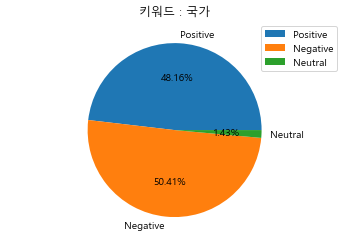

In [37]:
#% 시각화
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform

#한글 꺠짐 처리
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False
pos = keyword_content.loc[0, 'positive']
neg = str(keyword_content.loc[0, 'negative']).replace("-", "")
neu = keyword_content.loc[0, 'neutral']

size = [pos, neg, neu]

label = ['Positive','Negative','Neutral']

plt.axis('equal')
plt.pie(x=size, labels=label, autopct='%.2f%%')

plt.title("키워드 : " + key)
plt.legend(loc="upper right")
plt.show()